In [8]:
import pyfolio as pf
%matplotlib inline

# silence warnings
import warnings
warnings.filterwarnings('ignore')

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
"""
VOO SP500
VEA DEVELOPED MARKET
VB SMALL CAP
VWO EMERGING MARKET
BND TOTAL BOND MARKET
TAIL TAIL RISK
VXF SMALL MID CAP (except SP500)
VXUS TOTAL INTERNATION
FDFIX SP 500 41.16
FLXSX SMALL CAP 3.92
FLAPX MID CAP 3.92
FITFX INTERNATIONL 21
FIBUX BOND INDEX 25.00
FJTDX CONSERVATIVE 4.50
FLGXX MONEY MARKET .50


symbols = ['VOO','VEA', 'VB', 'VWO','BND']


symbols = ['FDFIX','FLXSX','FLAPX','FITFX','FIBUX','FJTDX','FLGXX']
price_data = web.get_data_yahoo(symbols,
                               start = '2017-06-01',
                               end = '2021-10-01')

price_data.to_csv('fidelity.csv', index=False) 


symbols = ['SHV']
price_data = web.get_data_yahoo(symbols,
                               start = '2017-06-01',
                               end = '2021-10-01')

price_data.to_csv('SHV.csv', index=False) 
"""

In [50]:
def download_prices(symbols,filename):
    df = web.get_data_yahoo(symbols,
                                   start = '2017-06-01',
                                   end = '2021-10-01')
    df = df['Adj Close']
    print(df.head())
    df.to_csv(filename, index=True) 
    
symbols = ['VOO','VEA', 'VB', 'VWO','BND']
download_prices(symbols,"vanguard.csv")

Symbols            VOO        VEA          VB        VWO        BND
Date                                                               
2017-06-01  205.743652  36.792721  126.842537  36.362495  72.847275
2017-06-02  206.388336  37.144638  127.312233  36.477684  73.087692
2017-06-05  206.250183  36.986279  126.711014  36.477684  72.971901
2017-06-06  205.660797  36.898293  126.353996  36.504272  73.105469
2017-06-07  206.001556  36.871902  126.260063  36.477684  73.007561


In [55]:
symbols = ['FDFIX','FLXSX','FLAPX','FITFX','FIBUX','BND','SHV']
download_prices(symbols,"fidelity.csv")

Symbols        FDFIX     FLXSX     FLAPX      FITFX     FIBUX        BND  \
Date                                                                       
2017-06-01  9.610501  9.583435  9.661138  10.000485  9.157722  72.847244   
2017-06-02  9.638412  9.648631  9.670420  10.092234  9.184608  73.087708   
2017-06-05  9.629107  9.592751  9.642577  10.073883  9.166682  72.971939   
2017-06-06  9.601199  9.583435  9.605454  10.055532  9.184608  73.105507   
2017-06-07  9.619805  9.592751  9.605454  10.037184  9.175649  73.007553   

Symbols            SHV  
Date                    
2017-06-01  104.779053  
2017-06-02  104.798073  
2017-06-05  104.788574  
2017-06-06  104.779053  
2017-06-07  104.788574  


In [80]:
def load_prices(filename):
    df = pd.read_csv(filename)  
    print(df.head())
    return df
df_fidelity = load_prices("fidelity.csv")
print(df_fidelity.tail())
df_vanguard = load_prices("vanguard.csv")
print(df_vanguard.tail())

         Date     FDFIX     FLXSX     FLAPX      FITFX     FIBUX        BND  \
0  2017-06-01  9.610501  9.583435  9.661138  10.000485  9.157722  72.847244   
1  2017-06-02  9.638412  9.648631  9.670420  10.092234  9.184608  73.087708   
2  2017-06-05  9.629107  9.592751  9.642577  10.073883  9.166682  72.971939   
3  2017-06-06  9.601199  9.583435  9.605454  10.055532  9.184608  73.105507   
4  2017-06-07  9.619805  9.592751  9.605454  10.037184  9.175649  73.007553   

          SHV  
0  104.779053  
1  104.798073  
2  104.788574  
3  104.779053  
4  104.788574  
            Date      FDFIX      FLXSX      FLAPX  FITFX  FIBUX        BND  \
1088  2021-09-27  19.020000  16.610001  17.510000  14.01  10.61  85.699425   
1089  2021-09-28  18.629999  16.240000  17.180000  13.73  10.57  85.329987   
1090  2021-09-29  18.660000  16.209999  17.180000  13.70  10.57  85.339973   
1091  2021-09-30  18.440001  16.059999  16.980000  13.68  10.58  85.320000   
1092  2021-10-01  18.590000  16.330000 

In [73]:
def display_analysis(price_data,w):
    price_data['Date'] = pd.to_datetime(price_data['Date'])
    price_data = price_data.set_index('Date')
    price_data.head()
    
    print(sum(w))
    ret_data = price_data.pct_change()[1:]
    print(ret_data.head())
    weighted_returns = (w * ret_data)
    print(weighted_returns.head())
    port_ret = weighted_returns.sum(axis=1)

    fig = plt.figure()
    ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
    ax1.hist(port_ret, bins = 60)
    ax1.set_xlabel('Portfolio returns')
    ax1.set_ylabel("Freq")
    ax1.set_title("Portfolio Returns calculated manually")
    plt.show(); 
    pf.create_returns_tear_sheet(port_ret)

1.0
               FDFIX     FLXSX     FLAPX     FITFX     FIBUX       BND  \
Date                                                                     
2017-06-02  0.002904  0.006803  0.000961  0.009174  0.002936  0.003301   
2017-06-05 -0.000965 -0.005792 -0.002879 -0.001818 -0.001952 -0.001584   
2017-06-06 -0.002898 -0.000971 -0.003850 -0.001822  0.001955  0.001830   
2017-06-07  0.001938  0.000972  0.000000 -0.001825 -0.000975 -0.001340   
2017-06-08  0.000000  0.013592  0.002899  0.000000 -0.000977 -0.000732   

                 SHV  
Date                  
2017-06-02  0.000182  
2017-06-05 -0.000091  
2017-06-06 -0.000091  
2017-06-07  0.000091  
2017-06-08  0.000000  
               FDFIX     FLXSX     FLAPX     FITFX     FIBUX       BND  \
Date                                                                     
2017-06-02  0.001162  0.000272  0.000038  0.001927  0.000734  0.000165   
2017-06-05 -0.000386 -0.000232 -0.000115 -0.000382 -0.000488 -0.000079   
2017-06-06 -0.001159

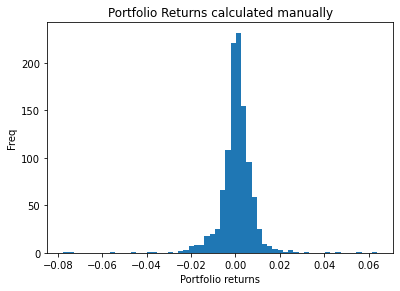

Start date,2017-06-02
End date,2021-10-01
Total months,52
,Backtest
Annual return,10.764%
Cumulative returns,55.738%
Annual volatility,13.1%
Sharpe ratio,0.85
Calmar ratio,0.43
Stability,0.83
Max drawdown,-24.942%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,24.94,2020-02-19,2020-03-23,2020-07-29,116
1,12.86,2018-01-26,2018-12-24,2019-04-01,307
2,5.60,2020-09-02,2020-09-23,2020-11-09,49
3,3.85,2019-05-03,2019-05-31,2019-06-19,34
4,3.79,2019-07-24,2019-08-14,2019-09-11,36


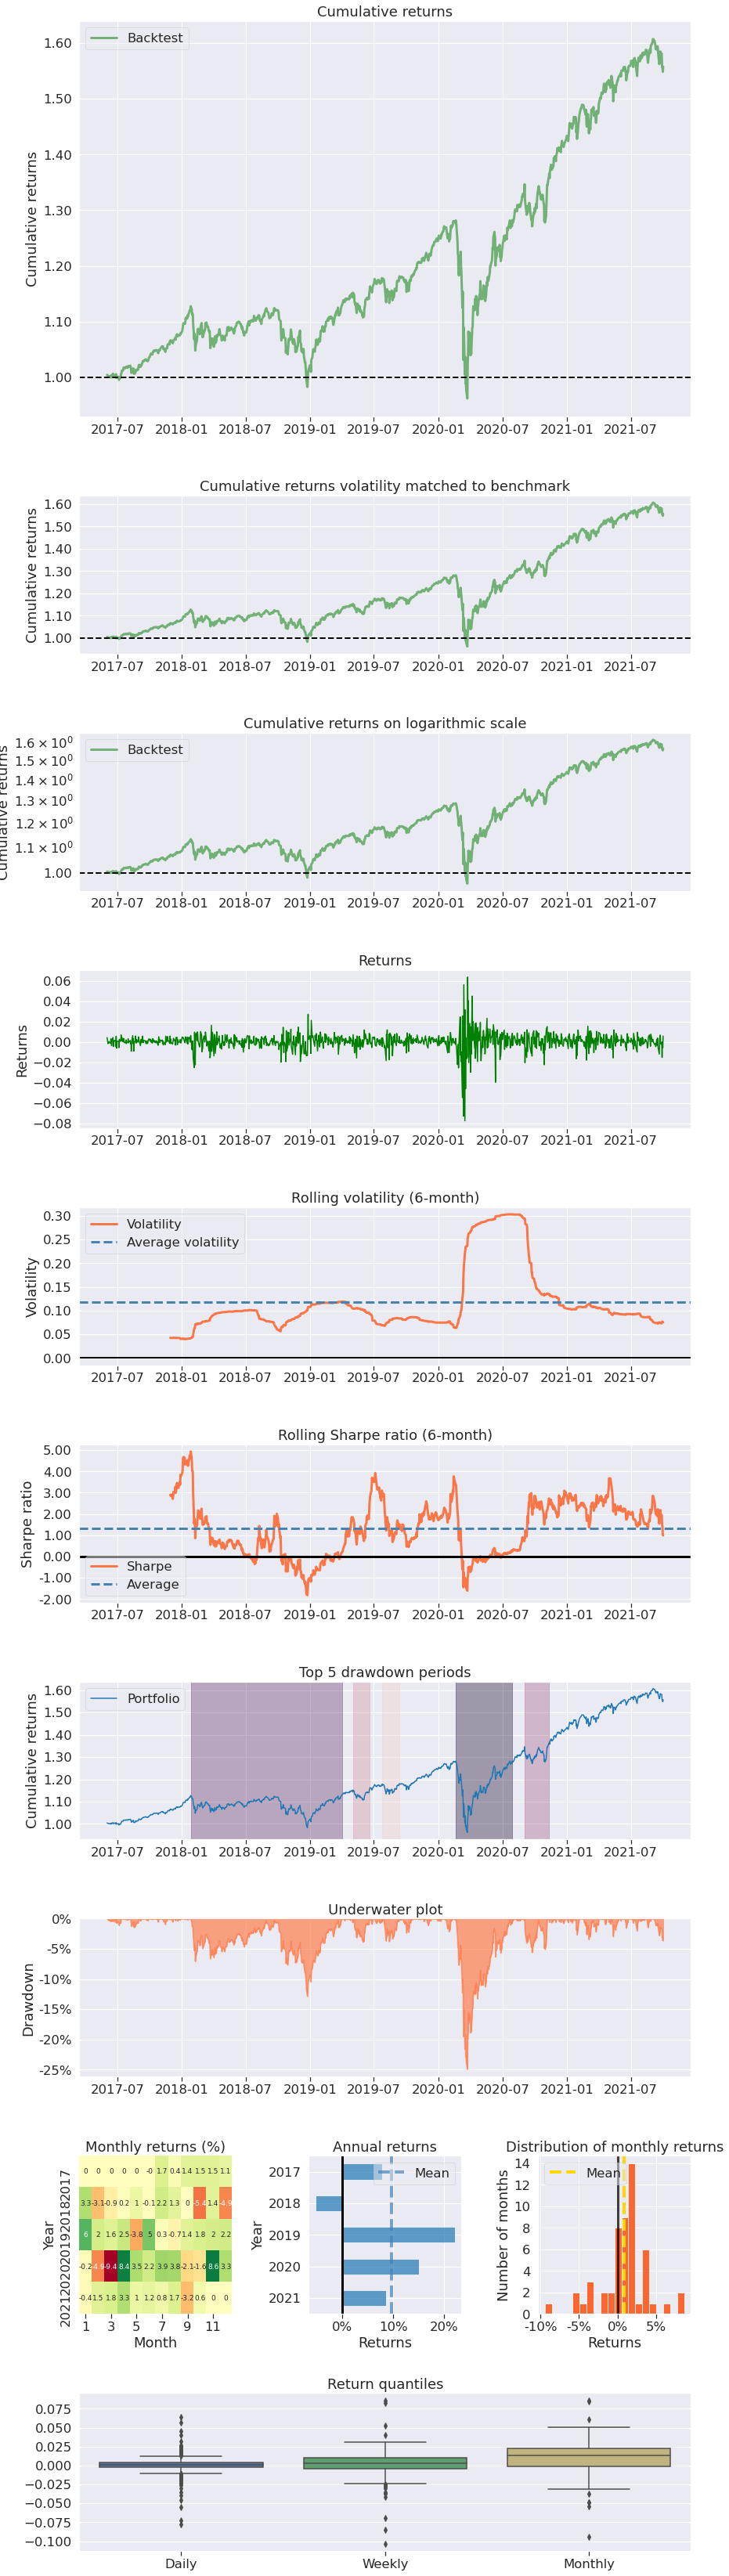

In [76]:
w = [0.40,0.04,0.04,0.21,0.25,0.05,0.01]
display_analysis(df_fidelity,w)


1.0
                 VOO       VEA        VB       VWO       BND
Date                                                        
2017-06-02  0.003133  0.009565  0.003703  0.003168  0.003300
2017-06-05 -0.000669 -0.004263 -0.004722  0.000000 -0.001584
2017-06-06 -0.002858 -0.002379 -0.002818  0.000729  0.001830
2017-06-07  0.001657 -0.000715 -0.000743 -0.000728 -0.001339
2017-06-08  0.000358 -0.001432  0.009226  0.001943 -0.000732
                 VOO       VEA        VB       VWO       BND
Date                                                        
2017-06-02  0.001253  0.001913  0.000370  0.000317  0.000660
2017-06-05 -0.000268 -0.000853 -0.000472  0.000000 -0.000317
2017-06-06 -0.001143 -0.000476 -0.000282  0.000073  0.000366
2017-06-07  0.000663 -0.000143 -0.000074 -0.000073 -0.000268
2017-06-08  0.000143 -0.000286  0.000923  0.000194 -0.000146


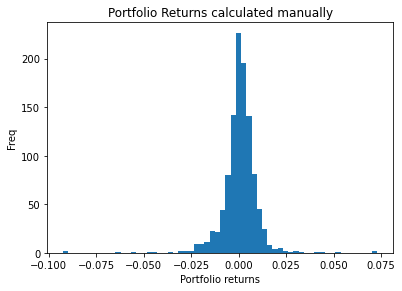

Start date,2017-06-02
End date,2021-10-01
Total months,52
,Backtest
Annual return,11.433%
Cumulative returns,59.853%
Annual volatility,15.701%
Sharpe ratio,0.77
Calmar ratio,0.40
Stability,0.77
Max drawdown,-28.739%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,28.74,2020-02-12,2020-03-23,2020-08-06,127
1,15.66,2018-01-26,2018-12-24,2019-04-23,323
2,6.13,2020-09-02,2020-09-23,2020-10-12,29
3,5.42,2020-10-12,2020-10-30,2020-11-05,19
4,5.00,2019-07-24,2019-08-14,2019-10-17,62


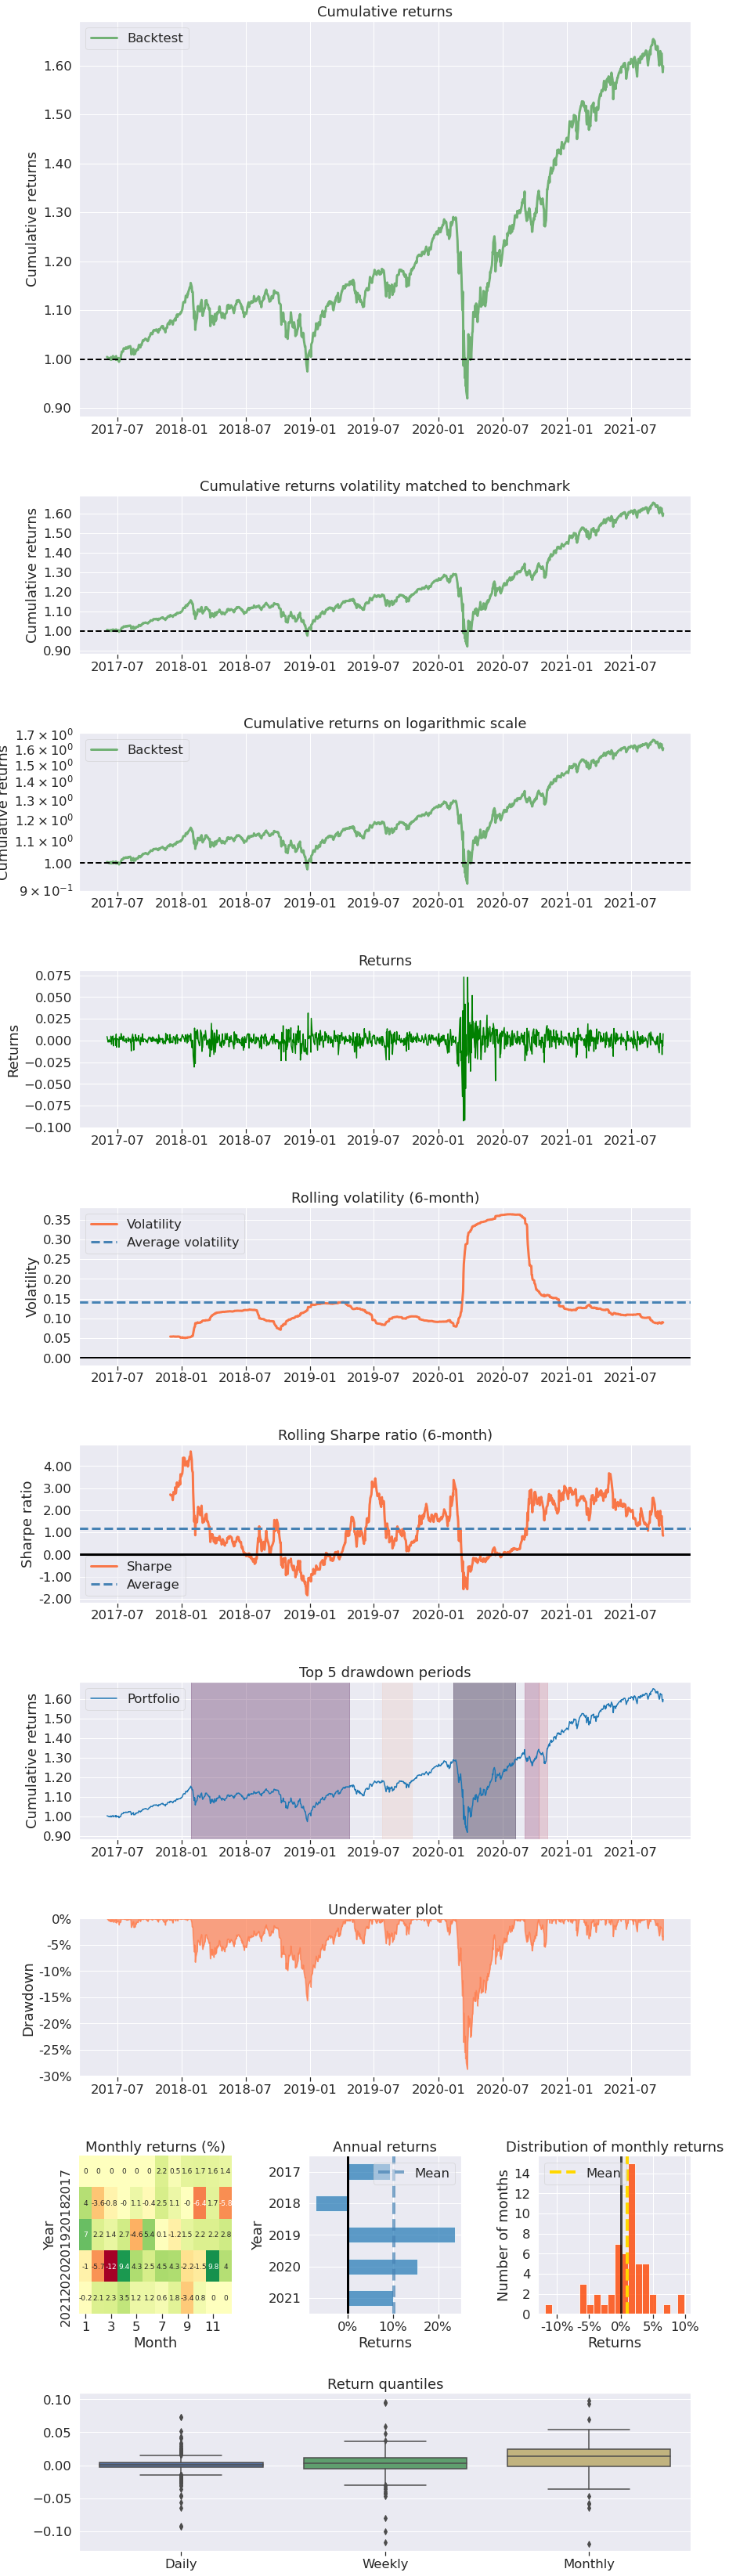

In [85]:
w = [0.40,0.20,0.10,0.10,0.20]
display_analysis(df_vanguard,w)

In [79]:

# axis =1 tells pandas we want to add
# the rows